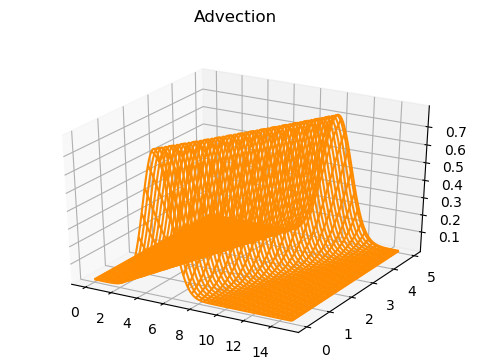

In [6]:
# Daniel Boe
# September 7, 2019
# Numicial solution to transport equation

'''The goal of this script is to motivate ideas behind numerical methods by 
solving the simple transport equation.  The problem statement originated as 
the first project in ME 402 - Gas Dynamics - Spring 2018'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline


def ini_condition(x):
    sigma=0.5
    xBar=5

    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-xBar)**2/(2*sigma*2))


step_size=0.1
u=1
SpaceDomain=np.arange(0,15,step_size)
TimeDomain=np.arange(0,5,step_size/u/2)

DF=pd.DataFrame({'x':SpaceDomain})
DF[0]=ini_condition(DF.x)
DF.set_index('x',inplace=True) 

for t in TimeDomain[1:]:
    DF[round(t,5)]=1/2*(DF.iloc[:,-1].shift().fillna(0)\
                - DF.iloc[:,-1])+DF.iloc[:,-1]


#DF=DF.melt(id_vars=['x'],var_name='time')

# Generate the Mesh
t,x=np.meshgrid(TimeDomain,SpaceDomain)

fig=plt.figure(dpi=100)
ax=fig.gca(projection='3d')
ax.plot_wireframe(x,t,DF,color='darkorange')
fig.suptitle('Advection')

plt.show()

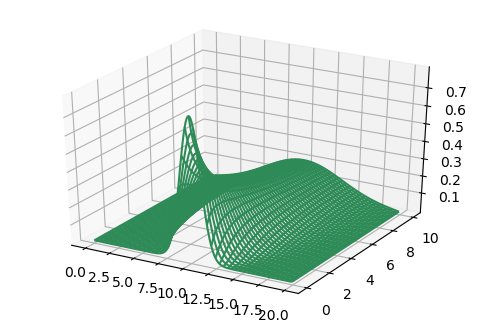

In [4]:
# Daniel Boe
# September 8, 2019
# Numerical solution to transport equation with Diffusion

'''The goal of this script is to motivate ideas behind numerical methods by 
solving the simple transport equation.  The problem statement originated as 
the first project in ME 402 - Gas Dynamics - Spring 2018'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

def ini_condition(x):
    sigma=0.5
    xBar=10

    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-xBar)**2/(2*sigma*2))

# Define the constants
u=1
D=0.75

# Set the step size
step_size=0.1

# dt=step_size/u/2
dt=0.01/2

# Construct the domain
SpaceDomain=np.arange(0,20,step_size)
TimeDomain=np.arange(0,10,dt)

DF=pd.DataFrame({'x':SpaceDomain})
DF[0]=ini_condition(DF.x)
DF.set_index('x',inplace=True)

for t in TimeDomain[1:]:

    '''Backwards Difference'''
    # DF[round(t,5)]=D*dt/step_size**2*(DF.iloc[:,-1]-2*DF.iloc[:,-1].shift().fillna(0)+\
    #       DF.iloc[:,-1].shift(2).fillna(0)) + DF.iloc[:,-1]

    '''Forward Difference'''
    DF[round(t,5)]=D*dt/step_size**2*(DF.iloc[:,-1].shift(-1).fillna(0)-\
          2*DF.iloc[:,-1]+DF.iloc[:,-1].shift().fillna(0)) + DF.iloc[:,-1]

#DF=DF.melt(id_vars=['x'],var_name='time')

#Generate the Mesh
t,x=np.meshgrid(TimeDomain,SpaceDomain)

fig=plt.figure(dpi=100)
ax=fig.gca(projection='3d')
ax.plot_wireframe(x,t,DF,color='seagreen')

plt.show()

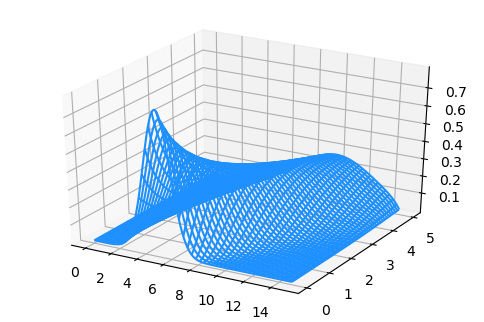

In [9]:
# Daniel Boe
# September 8, 2019
# Numicial solution to transport equation with Diffusion

'''The goal of this script is to motivate ideas behind numerical methods by 
solving the simple transport equation.  The problem statement originated as 
the first project in ME 402 - Gas Dynamics - Spring 2018'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def ini_condition(x):
    sigma=0.5
    xBar=5

    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-xBar)**2/(2*sigma*2))

# Define the constants
u=1
D=0.75

# Set the step size
step_size=0.1
dt=0.01/2

# Construct the domain
SpaceDomain=np.arange(0,15,step_size)
TimeDomain=np.arange(0,5,dt)

DF=pd.DataFrame({'x':SpaceDomain})
DF[0]=ini_condition(DF.x)
DF.set_index('x',inplace=True) 

for t in TimeDomain[1:]:
    DF[round(t,5)]=dt*(D/step_size**2*DF.iloc[:,-1].shift(-1).fillna(0) - \
          1/step_size**2*((2*D+u*step_size)*DF.iloc[:,-1]-\
          (D+u*step_size)*DF.iloc[:,-1].shift().fillna(0))) +DF.iloc[:,-1]



#DF=DF.melt(id_vars=['x'],var_name='time')

#Generate the Mesh
t,x=np.meshgrid(TimeDomain,SpaceDomain)

fig=plt.figure(dpi=100)
ax=fig.gca(projection='3d')
ax.plot_wireframe(x,t,DF,color='dodgerblue')
plt.show()
